In [3]:
'''
Movie Recommender System using Content-based filtering.
'''

import numpy as np
import pandas as pd

credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')
metadata = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')

'''
Only using keywords, tags, actors and directors, etc. Ratings and such can be used for further User-based systems.
'''

<ipython-input-3-92809cb6f5f1>:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


'\nOnly using keywords, tags, actors and directors, etc. Ratings and such can be used for further User-based systems.\n'

In [4]:
credits.shape

(45476, 3)

In [5]:
keywords.shape # keywords are more than credits, meaning credits have some null values.

(46419, 2)

In [6]:
metadata.shape # same here, some missing values

(45466, 24)

In [7]:
credits.head(5) # cast, crew, id

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
keywords.head(5) # id, keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [9]:
metadata.head(5) 

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
metadata['original_language'].value_counts()

original_language
en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: count, Length: 92, dtype: int64

In [11]:
'''
METADATA COLUMNS ANALYSIS:

adult -> can be used.
collection -> not useful as most movies are standalone.
budget -> useless.
genres -> useful.
homepage -> useless.
og-lang -> not useful as en will be heavily biased.
og-title -> we will use title.
overview -> very important.
release-date -> can be used when converted to categorical data ['old', 'new', 'medium']
revenue -> useless.
runtime, lang, runtime, status, video -> not useful.
tagline -> most taglines are vague, so not useful.
title -> will be used.
vote_avg, count -> can be used when catgorical
'''

"\nMETADATA COLUMNS ANALYSIS:\n\nadult -> can be used.\ncollection -> not useful as most movies are standalone.\nbudget -> useless.\ngenres -> useful.\nhomepage -> useless.\nog-lang -> not useful as en will be heavily biased.\nog-title -> we will use title.\noverview -> very important.\nrelease-date -> can be used when converted to categorical data ['old', 'new', 'medium']\nrevenue -> useless.\nruntime, lang, runtime, status, video -> not useful.\ntagline -> most taglines are vague, so not useful.\ntitle -> will be used.\nvote_avg, count -> can be used when catgorical\n"

In [12]:
metadata['popularity'] # can be used.

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45466, dtype: object

In [13]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
metadata = metadata[['adult', 'genres', 'id', 'overview', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']]

In [15]:
metadata.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413.0
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,Grumpier Old Men,6.5,92.0
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34.0
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173.0


In [16]:
metadata.isna().sum() # overviews are missing the most, and they are very important, so have to drop.

adult             0
genres            0
id                0
overview        954
popularity        5
release_date     87
title             6
vote_average      6
vote_count        6
dtype: int64

In [17]:
metadata.dropna(inplace=True)

In [18]:
metadata.shape

(44435, 9)

In [19]:
metadata.isna().sum()

adult           0
genres          0
id              0
overview        0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [20]:
metadata.duplicated().sum() # 13 rows are duplicated

13

In [21]:
metadata.drop_duplicates(inplace=True)

In [22]:
metadata.shape #metadata is cleaned initially

(44422, 9)

In [23]:
'''
Now turn for credits and keywords
'''

'\nNow turn for credits and keywords\n'

In [24]:
credits.isna().sum() # no null values

cast    0
crew    0
id      0
dtype: int64

In [25]:
credits.duplicated().sum()

37

In [26]:
credits.drop_duplicates(inplace=True)

In [27]:
credits.shape # credits is cleaned

(45439, 3)

In [28]:
keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [29]:
keywords.duplicated().sum() # almost 1000 rows are duplicated

987

In [30]:
keywords.drop_duplicates(inplace=True)

In [31]:
keywords.shape

(45432, 2)

In [32]:
# merging the dataframes

credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45439 non-null  object
 1   crew    45439 non-null  object
 2   id      45439 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [33]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45432 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45432 non-null  int64 
 1   keywords  45432 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [34]:
# in metadata, id is object, so first, convert to int, also converting, pop, and votes.

metadata['id'] = metadata['id'].apply(lambda x : int(x))
metadata['popularity'] = metadata['popularity'].apply(lambda x : float(x))
metadata['vote_average'] = metadata['vote_average'].apply(lambda x : float(x))
metadata['vote_count'] = metadata['vote_count'].apply(lambda x : int(x))

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44422 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         44422 non-null  object 
 1   genres        44422 non-null  object 
 2   id            44422 non-null  int64  
 3   overview      44422 non-null  object 
 4   popularity    44422 non-null  float64
 5   release_date  44422 non-null  object 
 6   title         44422 non-null  object 
 7   vote_average  44422 non-null  float64
 8   vote_count    44422 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.4+ MB


In [35]:
merged = pd.merge(pd.merge(metadata, keywords, on='id'), credits, on='id')

In [36]:
merged.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,Grumpier Old Men,6.5,92,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [37]:
'''
Problem: all imp columns are in form of string dicts eg:
'''

merged['genres'][0]

'''
"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

to -> Animation, Comedy, Family
'''

'\n"[{\'id\': 16, \'name\': \'Animation\'}, {\'id\': 35, \'name\': \'Comedy\'}, {\'id\': 10751, \'name\': \'Family\'}]"\n\nto -> Animation, Comedy, Family\n'

In [38]:
import ast
from ast import literal_eval
# literal eval convert any string to its actual type

def convert(obj):

    L = []

    for i in literal_eval(obj):
        L.append(i['name'])

    return L

In [39]:
convert("[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]")

['Animation', 'Comedy', 'Family']

In [40]:
merged['genres'] = merged['genres'].apply(convert)
merged['keywords'] = merged['keywords'].apply(convert)

merged.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew
0,False,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415,"[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413,"[board game, disappearance, based on children'...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,Grumpier Old Men,6.5,92,"[fishing, best friend, duringcreditsstinger, o...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34,"[based on novel, interracial relationship, sin...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173,"[baby, midlife crisis, confidence, aging, daug...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [41]:
merged['cast'][0] # 'name'

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [42]:
'''
for cast, we will only use the first 5 actors/actresses.
'''

def convert_cast(obj):

    L = []
    counter = 0

    for i in literal_eval(obj):
        if counter != 5:
            L.append(i['name'])
            counter += 1

    return L


In [43]:
merged['cast'] = merged['cast'].apply(convert_cast)

In [44]:
merged.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew
0,False,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,Grumpier Old Men,6.5,92,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [45]:
merged['crew'][0] # '\job', '\Director', '\name'

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [46]:
def convert_crew(obj):

    for i in literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']

In [47]:
merged['crew'] = merged['crew'].apply(convert_crew)

In [48]:
merged.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew
0,False,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,Toy Story,7.7,5415,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,False,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,Jumanji,6.9,2413,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,False,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,Grumpier Old Men,6.5,92,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,False,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,Waiting to Exhale,6.1,34,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,False,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,Father of the Bride Part II,5.7,173,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [49]:
credits['crew'][1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [50]:
merged['crew'].head(20)

0       John Lasseter
1        Joe Johnston
2       Howard Deutch
3     Forest Whitaker
4       Charles Shyer
5        Michael Mann
6      Sydney Pollack
7        Peter Hewitt
8         Peter Hyams
9     Martin Campbell
10         Rob Reiner
11         Mel Brooks
12        Simon Wells
13       Oliver Stone
14       Renny Harlin
15    Martin Scorsese
16            Ang Lee
17     Allison Anders
18     Steve Oedekerk
19       Joseph Ruben
Name: crew, dtype: object

In [51]:
merged.isna().sum() # 763 directors are still missing, but 763 << ~43000, so can drop

adult             0
genres            0
id                0
overview          0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
keywords          0
cast              0
crew            763
dtype: int64

In [52]:
merged.dropna(inplace=True)

In [53]:
merged.isna().sum()

adult           0
genres          0
id              0
overview        0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
keywords        0
cast            0
crew            0
dtype: int64

In [54]:
merged.shape

(43671, 12)

In [55]:
test_duplicate = merged.drop(columns=['genres', 'cast', 'keywords'])

test_duplicate.duplicated().sum() # 16 rows is not a big enough number to figure out dropping with the lists.

16

In [56]:
merged['overview'] = merged['overview'].apply(lambda x: x.split())

merged.head(5)

,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew
0,False,"[Animation, Comedy, Family]",862,"[Led, by, Woody,, Andy's, toys, live, happily,...",21.946943,1995-10-30,Toy Story,7.7,5415,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,False,"[Adventure, Fantasy, Family]",8844,"[When, siblings, Judy, and, Peter, discover, a...",17.015539,1995-12-15,Jumanji,6.9,2413,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,False,"[Romance, Comedy]",15602,"[A, family, wedding, reignites, the, ancient, ...",11.712900,1995-12-22,Grumpier Old Men,6.5,92,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,False,"[Comedy, Drama, Romance]",31357,"[Cheated, on,, mistreated, and, stepped, on,, ...",3.859495,1995-12-22,Waiting to Exhale,6.1,34,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,False,[Comedy],11862,"[Just, when, George, Banks, has, recovered, fr...",8.387519,1995-02-10,Father of the Bride Part II,5.7,173,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [57]:
merged['crew'] = merged['crew'].apply(lambda x: [x])

merged['crew']

0           [John Lasseter]
1            [Joe Johnston]
2           [Howard Deutch]
3         [Forest Whitaker]
4           [Charles Shyer]
                ...        
44429          [John Irvin]
44430            [Lav Diaz]
44431      [Mark L. Lester]
44432    [Yakov Protazanov]
44433       [Daisy Asquith]
Name: crew, Length: 43671, dtype: object

In [58]:
merged['tags'] = merged['overview'] + merged['genres'] + merged['keywords'] + merged['cast'] + merged['crew']

merged['tags']

0        [Led, by, Woody,, Andy's, toys, live, happily,...
1        [When, siblings, Judy, and, Peter, discover, a...
2        [A, family, wedding, reignites, the, ancient, ...
3        [Cheated, on,, mistreated, and, stepped, on,, ...
4        [Just, when, George, Banks, has, recovered, fr...
                               ...                        
44429    [Yet, another, version, of, the, classic, epic...
44430    [An, artist, struggles, to, finish, his, work,...
44431    [When, one, of, her, hits, goes, wrong,, a, pr...
44432    [In, a, small, town, live, two, brothers,, one...
44433    [50, years, after, decriminalisation, of, homo...
Name: tags, Length: 43671, dtype: object

In [59]:
merged['tags'] = merged['tags'].apply(lambda x: [i.replace(" ", "") for i in x])

merged['tags'][0]

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'Animation',
 'Comedy',
 'Family',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'TomHanks',
 'TimAllen',
 'DonRickles',
 'JimVarney',
 'WallaceShawn',
 'JohnLasseter']

In [60]:
merged['tags'] = merged['tags'].apply(lambda x: " ".join(x))

merged['tags'][1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. Adventure Fantasy Family boardgame disappearance basedonchildren'sbook newhome recluse giantinsect RobinWilliams JonathanHyde KirstenDunst BradleyPierce BonnieHunt JoeJohnston"

In [61]:
merged['tags'] = merged['tags'].apply(lambda x : x.lower())

merged['tags'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles jimvarney wallaceshawn johnlasseter"

In [62]:
'''
tags are ready, now time for numerical to categorical
'''

merged['release_date'] = merged['release_date'].apply(lambda x: int(x.split("-")[0]))

merged['release_date']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
44429    1991
44430    2011
44431    2003
44432    1917
44433    2017
Name: release_date, Length: 43671, dtype: int64

In [63]:
merged['release_date'].value_counts()

release_date
2014    1874
2015    1821
2013    1817
2012    1654
2011    1594
        ... 
1887       1
2020       1
1878       1
1874       1
1883       1
Name: count, Length: 135, dtype: int64

<Axes: >

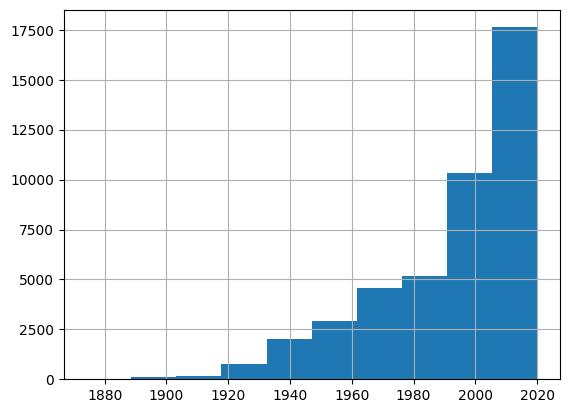

In [64]:
merged['release_date'].hist(bins=10)

In [65]:
merged[merged['release_date'] < 1990].count() # ~15000 before 1990

adult           15320
genres          15320
id              15320
overview        15320
popularity      15320
release_date    15320
title           15320
vote_average    15320
vote_count      15320
keywords        15320
cast            15320
crew            15320
tags            15320
dtype: int64

In [66]:
merged[merged['release_date'] < 2001].count()

adult           21519
genres          21519
id              21519
overview        21519
popularity      21519
release_date    21519
title           21519
vote_average    21519
vote_count      21519
keywords        21519
cast            21519
crew            21519
tags            21519
dtype: int64

In [67]:
# movies before 2001 -> old, after 2001 -> new

In [68]:
merged.reset_index(inplace=True)

merged.shape

(43671, 14)

In [69]:
age = []

for i in range(merged.shape[0]):
    if merged['release_date'][i] < 2001:
        age.append('old')
    else:
        age.append('new')

merged['age'] = age
merged['age'].value_counts()

age
new    22152
old    21519
Name: count, dtype: int64

<Axes: >

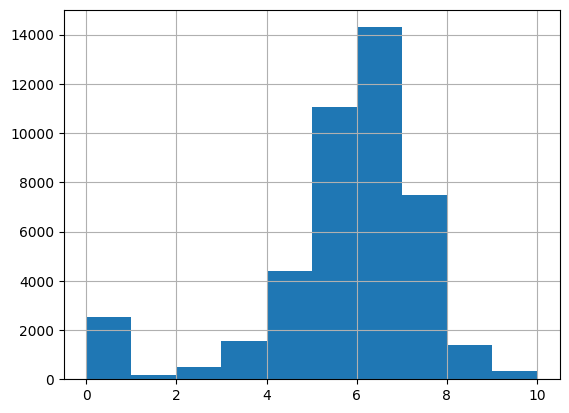

In [70]:
merged['vote_average'].hist()

In [71]:
'''
0-4 -> bad
5-7 -> average
8-10 -> good
'''

review = []

for i in range(merged.shape[0]):
    if merged['vote_average'][i] <= 4:
        review.append('bad')
    elif merged['vote_average'][i] >= 5 and merged['vote_average'][i] <= 7:
        review.append('average')
    else:
        review.append('good')

merged['review'] = review
merged['review'].value_counts()

review
average    27131
good       11166
bad         5374
Name: count, dtype: int64

In [72]:
merged['review']

0           good
1        average
2        average
3        average
4        average
          ...   
43666    average
43667       good
43668        bad
43669        bad
43670        bad
Name: review, Length: 43671, dtype: object

In [73]:
merged['tags'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles jimvarney wallaceshawn johnlasseter"

In [74]:
merged['final_tag'] = merged['tags'] + " " + merged['age'] + " " + merged['review']

merged['final_tag'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles jimvarney wallaceshawn johnlasseter old good"

In [75]:
merged['final_tag'][1]

"when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. adventure fantasy family boardgame disappearance basedonchildren'sbook newhome recluse giantinsect robinwilliams jonathanhyde kirstendunst bradleypierce bonniehunt joejohnston old average"

In [76]:
def format(obj):

    obj = obj.split()
    obj = obj[:-2]

    obj = " ".join(obj)

    return obj

format("when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. adventure fantasy family boardgame disappearance basedonchildren'sbook newhome recluse giantinsect robinwilliams jonathanhyde kirstendunst bradleypierce bonniehunt joejohnston old average old average")

"when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. adventure fantasy family boardgame disappearance basedonchildren'sbook newhome recluse giantinsect robinwilliams jonathanhyde kirstendunst bradleypierce bonniehunt joejohnston old average"

In [77]:
merged['final_tag'] = merged['final_tag'].apply(format)

merged['final_tag'][0]

"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife tomhanks timallen donrickles jimvarney wallaceshawn johnlasseter"

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english') # bag-of-words method
tf = TfidfVectorizer(max_features=5000, stop_words='english') # term frequency and rarity


vector_cv = cv.fit_transform(merged['final_tag']).toarray()
vector_tf = tf.fit_transform(merged['final_tag']).toarray()

In [79]:
vector_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
vector_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
# finding similarity

from sklearn.metrics.pairwise import cosine_similarity

similarity_cv = cosine_similarity(vector_cv)

In [82]:
similarity_cv

array([[1.        , 0.048795  , 0.05270463, ..., 0.        , 0.01767767,
        0.        ],
       [0.048795  , 1.        , 0.07715167, ..., 0.        , 0.03450328,
        0.04279605],
       [0.05270463, 0.07715167, 1.        , ..., 0.        , 0.0186339 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01767767, 0.03450328, 0.0186339 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04279605, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [83]:
len(similarity_cv)

43671

In [84]:
len(similarity_cv[0])

43671

In [85]:
def recommend_movie_cv(movie):

    idx = merged[merged['title'] == movie].index[0]
    similar_list = similarity_cv[idx]

    movie_list = sorted(list(enumerate(similar_list)), reverse=True, key=lambda x:x[1])[0:10]
    # will return 10 movies

    for i in movie_list:
        print(merged['title'][i[0]])

In [86]:
recommend_movie_cv('Jumanji')

Jumanji
Liar Game: Reborn
Minecraft: The Story of Mojang
Word Wars
Dungeons & Dragons
Beta Test
Brainscan
Wreck-It Ralph
Quiz
Turkey Shoot


In [87]:
merged['title'][1:20]

1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
5                               Heat
6                            Sabrina
7                       Tom and Huck
8                       Sudden Death
9                          GoldenEye
10            The American President
11       Dracula: Dead and Loving It
12                             Balto
13                             Nixon
14                  Cutthroat Island
15                            Casino
16             Sense and Sensibility
17                        Four Rooms
18    Ace Ventura: When Nature Calls
19                       Money Train
Name: title, dtype: object

In [88]:
 recommend_movie_cv('Heat')

Heat
Kiss Kiss Bang Bang
No Good Deed
Shield for Murder
Not For, or Against (Quite the Contrary)
The Long Goodbye
Slow Burn
Columbus Day
Blood and Wine
The Crimson Kimono


In [89]:
recommend_movie_cv('Toy Story')

Toy Story
Toy Story 3
Toy Story 2
The 40 Year Old Virgin
The Champ
Andy Peters: Exclamation Mark Question Point
Andy Hardy's Blonde Trouble
Partysaurus Rex
Hawaiian Vacation
You're Only Young Once


In [90]:
merged['title'][40000:40010]

40000            The Space Between Us
40001    Rogue One: A Star Wars Story
40002                             Pet
40003                   Live by Night
40004                           Split
40005                       Old Stone
40006               Asperger's Are Us
40007                   Opening Night
40008                   National Bird
40009                A Kind of Murder
Name: title, dtype: object

In [91]:
recommend_movie_cv('Rogue One: A Star Wars Story')

Rogue One: A Star Wars Story
Babylon 5: The Gathering
Prince of Space
Titan A.E.
The Hitchhiker's Guide to the Galaxy
Stargate: The Ark of Truth
Rebirth of Mothra
LEGO Hero Factory: Savage Planet
The Terminators
Horror of the Blood Monsters


In [92]:
recommend_movie_cv('Iron Man')

Iron Man
Iron Man 3
Iron Man 2
Avengers: Age of Ultron
Guardians of the Galaxy Vol. 2
X-Men
Doctor Strange
Marvel One-Shot: Item 47
Captain America: Civil War
X-Men: The Last Stand


In [93]:
recommend_movie_cv('Batman Begins')

Batman Begins
The Dark Knight
Batman: The Dark Knight Returns, Part 1
Batman: Under the Red Hood
Bablo
Batman & Robin
The Dark Knight Rises
Helter Skelter
Batman
LEGO DC Comics Super Heroes: Batman: Be-Leaguered


In [94]:
recommend_movie_cv('Avengers: Age of Ultron')

Avengers: Age of Ultron
Iron Man
Iron Man 3
Captain America: Civil War
Avatar 2
Viva Knievel!
The Avengers
Thor: Ragnarok
Guardians of the Galaxy Vol. 2
Shadowboxing


In [95]:
sample_sim = similarity_cv[1]
sample_sim

array([0.048795  , 1.        , 0.07715167, ..., 0.        , 0.03450328,
       0.04279605])

In [96]:
sample_sim.sort()
sample_sim = np.flip(sample_sim)
sample_sim[0:10] # Top 10 similarity scores

array([1.        , 0.36228442, 0.31180478, 0.3086067 , 0.3003757 ,
       0.27954262, 0.27904046, 0.27826129, 0.27774603, 0.26115161])

In [97]:
'''
The Top scores are in the range of 0.26 to 0.36, which is not bad as it is, but can be improved using TFidf.
'''

'\nThe Top scores are in the range of 0.26 to 0.36, which is not bad as it is, but can be improved using TFidf.\n'

In [98]:
'''
To use TFidf, I will only use it on a slice of merged, as the complete dataframe is way too large for Kaggle kernel.
'''

new = merged[merged['release_date'] > 2010].iloc[:, :]

new.shape

(10843, 17)

In [99]:
new.head(5)

,index,adult,genres,id,overview,popularity,release_date,title,vote_average,vote_count,keywords,cast,crew,tags,age,review,final_tag
1063,1066,False,"[Comedy, Horror]",141210,"[The, town, of, Derry, has, a, secret,, but, n...",0.135596,2013,The Sleepover,8.0,1,[],"[Josh Feldman, Gus Kamp, Carolyn Jania, Kristi...",[Chris Cullari],"the town of derry has a secret, but no one tol...",new,good,"the town of derry has a secret, but no one tol..."
2081,2096,False,[Drama],143750,"[As, her, surroundings, are, invaded, by, outs...",0.211754,2012,The Farmer's Wife,10.0,1,[short],"[James Cartwright, Geraldine James, Alex Kelly...",[Francis Lee],"as her surroundings are invaded by outsiders, ...",new,good,"as her surroundings are invaded by outsiders, ..."
2527,2544,False,[Documentary],84198,"[Using, personal, stories,, this, powerful, do...",0.501046,2012,A Place at the Table,6.9,7,[woman director],"[Jeff Bridges, Tom Colicchio, Mariana Chilton,...",[Kristi Jacobson],"using personal stories, this powerful document...",new,average,"using personal stories, this powerful document..."
2741,2758,False,"[Romance, Drama, Comedy]",171982,"[She's, as, hot, as, Britney, Spears., Hotter....",0.052377,2012,Romance,0.0,0,[],"[Brian Allard, Amber Arrigotti, Robynn Hayek, ...",[Andy Mingo],she's as hot as britney spears. hotter. she pa...,new,bad,she's as hot as britney spears. hotter. she pa...
4078,4100,False,[Comedy],136558,"[The, documentary,, Kingdom, Come, follows, a,...",0.986251,2011,Kingdom Come,8.0,1,[],"[Daniel Gillies, Rachael Leigh Cook, Seth Gree...",[Paiman Kalayeh],"the documentary, kingdom come follows a first-...",new,good,"the documentary, kingdom come follows a first-..."


In [100]:
tf_final_vec = tf.fit_transform(new['final_tag']).toarray()

tf_final_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
tf_final_vec.shape

(10843, 5000)

In [102]:
final_sim = cosine_similarity(tf_final_vec)
final_sim

array([[1.        , 0.        , 0.04828488, ..., 0.02326169, 0.        ,
        0.        ],
       [0.        , 1.        , 0.10907321, ..., 0.00750134, 0.00662825,
        0.        ],
       [0.04828488, 0.10907321, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02326169, 0.00750134, 0.        , ..., 1.        , 0.01020917,
        0.        ],
       [0.        , 0.00662825, 0.        , ..., 0.01020917, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [105]:
new.reset_index(inplace=True)

In [106]:
def recommend_tf(movie):

    idx = new[new['title'] == movie].index[0]
    similar_list = final_sim[idx]

    movie_list = sorted(list(enumerate(similar_list)), reverse=True, key=lambda x:x[1])[0:10]
    # will return 10 movies

    for i in movie_list:
        print(merged['title'][i[0]])

In [107]:
recommend_tf('Avengers: Age of Ultron')

The Toxic Avenger Part II
Safe
Mad Max 2: The Road Warrior
Alien Nation
Assassin of the Tsar
The Crucible
Of Mice and Men
The Great Ziegfeld
Mad Max Beyond Thunderdome
Boomerang


In [109]:
recommend_tf('Interstellar')

Soldier
Sounder
Two Women
Speedway Junky
Auggie Rose
Psycho
The Heart of Me
Once Upon a Time in the West
For Keeps
Four Days in September


In [110]:
recommend_movie_cv('Interstellar')

Interstellar
Journey to the Seventh Planet
Manhunt in Space
Space Station 3D
SpaceCamp
First Spaceship on Venus
Space Warriors
Destiny in Space
Hail Columbia!
Race to Space


In [111]:
recommend_movie_cv('Inception')

Inception
Short Fuse
Seconds
Bulldog Drummond Escapes
Two Tigers
Duplex
Shadow Man
The Flying Man
Star Trek II: The Wrath of Khan
The Door


In [112]:
recommend_movie_cv('Shutter Island')

Shutter Island
The Conspirators
Uncle John
Gone Girl
Cornered
Black Book
Riphagen
Bottom of the World
Four Winds of Heaven
Enigma


In [114]:
sample = final_sim[1]

sample.sort()

flipped = np.flip(sample)

flipped[0:10]

# for TFidf, the similarity scores are quite low, that may be because of lesser data, or sparse data.

array([1.        , 0.22790711, 0.2164387 , 0.19311194, 0.18755194,
       0.18135335, 0.16211323, 0.15017825, 0.1500676 , 0.14902282])

**Final Thoughts:**

  1. CountVectorize is better than TFidf for this dataset.
  2. Further improvements can be including user ratings, and reviews.
  3. Other than vectorization, better results can be seen if Graph transformers, or RNN's are used.